<a href="https://colab.research.google.com/github/Ravula-vigneshwar/machine-learning-projects/blob/main/mall_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [3]:
# Load the dataset
file_path = "/content/Mall_Customers.csv"
df = pd.read_csv(file_path)

In [4]:
# Selecting relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [5]:
# Determining the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)

In [6]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

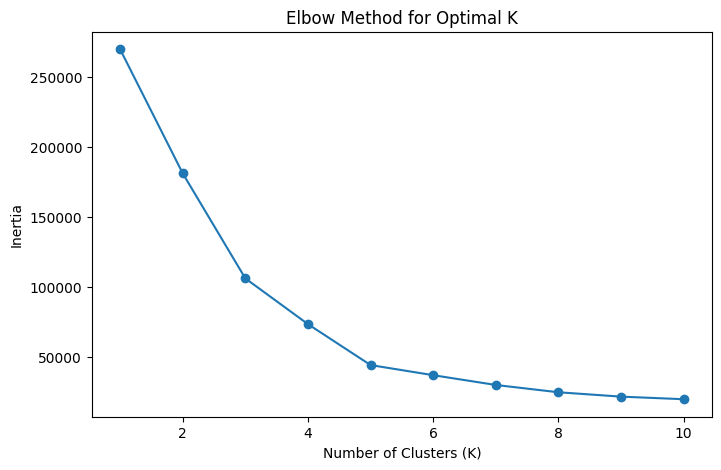

In [7]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [8]:
# Choosing the optimal number of clusters (K) based on the elbow method
optimal_k = 5


In [9]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

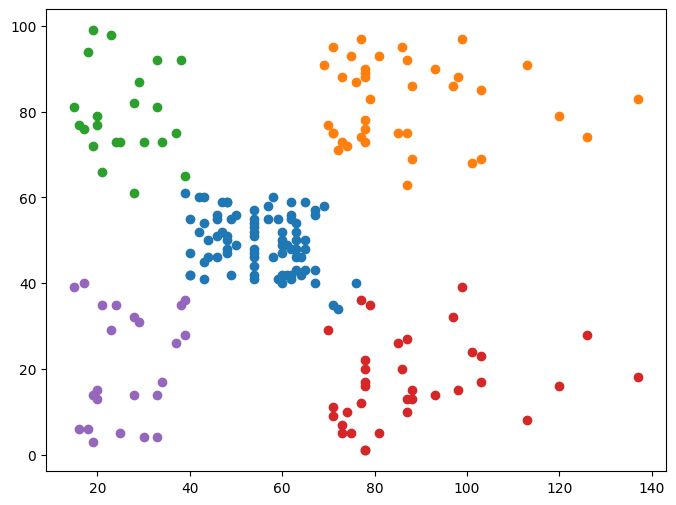

In [10]:
# Visualizing the clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster}')


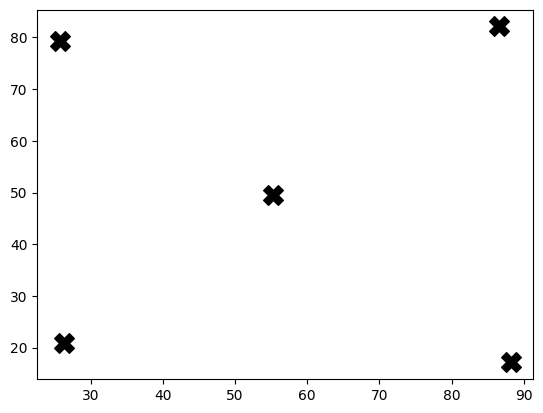

In [11]:
# Plotting cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')


<ipython-input-12-f59b7c271a66>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


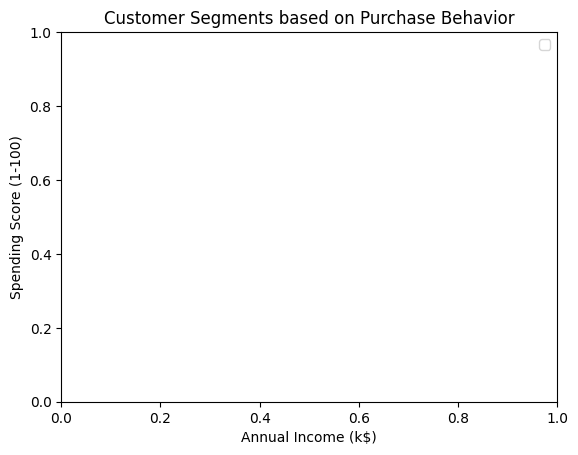

In [12]:
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments based on Purchase Behavior")
plt.legend()
plt.show()
